# Simple Regresi Linear

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error

## Case 1


### Persiapan data dan EDA

In [2]:
data_regresi = {
    'Rata - rata suhu':[27,28,25,26,24,27,23,24,23,22,21,26,25,26,27,24,22,21,20,22,19,20,23,24,25,21,20,20,19,25],
    'Jumlah produk cacat':[13,16,12,14,12,16,9,13,11,7,5,12,11,13,14,11,5,6,3,6,4,5,9,10,13,7,4,6,3,12]
}
data_regresi = pd.DataFrame(data_regresi)
data_regresi.head()

,Rata - rata suhu,Jumlah produk cacat
0,27,13
1,28,16
2,25,12
3,26,14
4,24,12


In [3]:
data_regresi.describe()

,Rata - rata suhu,Jumlah produk cacat
count,30.000000,30.000000
mean,23.300000,9.400000
std,2.628098,3.987913
min,19.000000,3.000000
25%,21.000000,6.000000
50%,23.500000,10.500000
75%,25.000000,12.750000
max,28.000000,16.000000


In [4]:
data_regresi.isnull().sum()

Rata - rata suhu       0
Jumlah produk cacat    0
dtype: int64

In [5]:
data_regresi.shape

(30, 2)

In [6]:
data_regresi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Rata - rata suhu     30 non-null     int64
 1   Jumlah produk cacat  30 non-null     int64
dtypes: int64(2)
memory usage: 608.0 bytes


### Memisahkan data (Training dan Test Dataset)

Dalam pemisahan data menggunakan fungsi *train_test_split()* untuk memisahkan *training dataset* dengan *test dataset* secara acak. Menggunakan parameter *test_size = 0.2* yang artinya 20% dari seluruh dataset akan dijadikan *test dataset*.

Ada semacam kesepakatan untuk menggunakan huruf X untuk mewakili feature dan huruf y untuk mewakili target feature. Feature di training dataset diwakili oleh X_train, feature di test dataset diwakili X_test. y_train dan y_test mewakili target untuk training dan test dataset

In [24]:
suhu = data_regresi[['Rata - rata suhu']] #x
cacat = data_regresi[['Jumlah produk cacat']]#y

X_train, X_test, y_train, y_test = ms.train_test_split(suhu, cacat, test_size=0.2, random_state=0)
print(X_train.size, X_test.size)

24 6


### Visualisasi

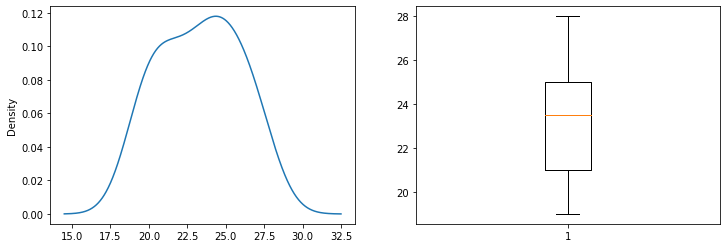

In [5]:
#Univariate analysis rata - rata suhu.
#Melihat distribusi dari rata - rata suhu.

f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
data_regresi['Rata - rata suhu'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(data_regresi['Rata - rata suhu'])
plt.show()

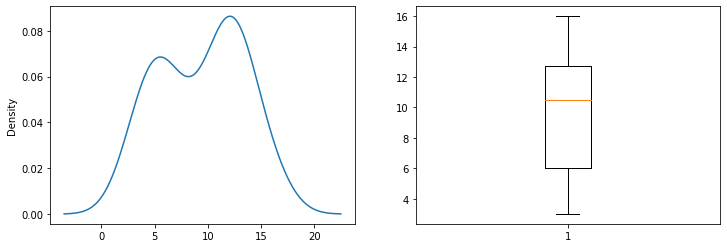

In [9]:
#Univariate analysis jumlah produk cacat.
#Melihat distribusi dari jumlah produk cacat.

f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
data_regresi['Jumlah produk cacat'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(data_regresi['Jumlah produk cacat'])
plt.show()

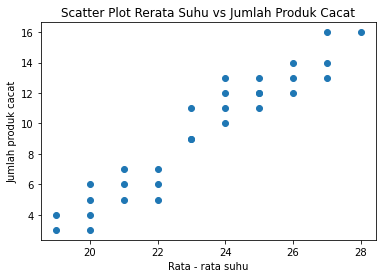

In [15]:
#Bivariate analysis
#Menggunakan scatter plot.
plt.scatter(data_regresi['Rata - rata suhu'], data_regresi['Jumlah produk cacat'])
plt.xlabel('Rata - rata suhu')
plt.ylabel('Jumlah produk cacat')
plt.title('Scatter Plot Rerata Suhu vs Jumlah Produk Cacat')
plt.show()

In [16]:
#Mengetahui nilai korelasi dari rerata suhu dengan jumlah produk cacat
data_regresi.corr()

,Rata - rata suhu,Jumlah produk cacat
Rata - rata suhu,1.000000,0.955458
Jumlah produk cacat,0.955458,1.000000


Nilai korelasi antara rata - rata suhu dengan jumlah produk cacat cukup tinggi yaitu 0.95 

### Pemodelan

In [17]:
model = lm.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
print(f"Y = {model.intercept_[0]:.2f} + {model.coef_[0][0]:.2f}X")

Y = -23.32 + 1.41X


In [22]:
prediksi = model.predict(X_test)
prediksi

array([[11.83438443],
       [ 3.39786126],
       [13.24047162],
       [ 6.21003565],
       [ 4.80394845],
       [11.83438443]])

### Scoring Model

In [15]:
r2 = model.score(X_test, y_test)
r2

0.9678087190129042

In [16]:
mse = mean_squared_error(y_test, prediksi)
mse

0.6187879567519529

In [19]:
print(y_test)

    Jumlah produk cacat
2                    12
28                    3
13                   13
10                    5
26                    4
24                   13


## CASE 2 (Scratch)

In [27]:
data2 ={
    'Biaya Iklan':[15,13,14,15,13,14,12,14,13,12],
    'Pendapatan':[65,61,60,63,59,62,56,61,60,58]
}
data2 = pd.DataFrame(data2)
data2

,Biaya Iklan,Pendapatan
0,15,65
1,13,61
2,14,60
3,15,63
4,13,59
5,14,62
6,12,56
7,14,61
8,13,60
9,12,58


In [37]:
#Menentukan variabel x(variabel bebas) dan y (variabel terikat / predictor)
X = data2['Biaya Iklan']
Y = data2['Pendapatan']

In [38]:
#Menghitung nilai x^2, y^2, dan xy
X2 = X**2
Y2 = Y**2
XY = X*Y

hasil = {
    'X' : X,
    'Y': Y,
    'X2': X2,
    'Y2':Y2,
    'XY':XY
}
hasil = pd.DataFrame(hasil)

#Menghitung jumlah masing2 kolom
total = hasil.sum()

#Membuat dataframe baru dengan baris "Jumlah"
jumlah = pd.DataFrame([total.values], columns=total.index, index=['Jumlah'])

#Menggabungkan dataframe hasil dengan dataframe jumlah
hasil = pd.concat([hasil,jumlah])

hasil

,X,Y,X2,Y2,XY
0,15,65,225,4225,975
1,13,61,169,3721,793
2,14,60,196,3600,840
3,15,63,225,3969,945
4,13,59,169,3481,767
5,14,62,196,3844,868
6,12,56,144,3136,672
7,14,61,196,3721,854
8,13,60,169,3600,780
9,12,58,144,3364,696


In [39]:
#Variabel total dari masing - masing kolom
total_X = X.sum()
total_Y = Y.sum()
total_XY = XY.sum()
total_X2 = X2.sum()
total_Y2 = Y2.sum()
n = len(hasil) - 1

#Menghitung konstanta (intersep) dan koefisien(Slope)
intersep = ((total_Y*total_X2)-(total_X * total_XY)) / ((n*total_X2) - total_X**2)
koefisien = ((n*total_XY) - (total_X * total_Y)) / ((n*total_X2) - total_X**2)

print(f"Y = {intersep:.2f} + {koefisien:.2f}X")

Y = 31.57 + 2.14X


In [11]:
#Menghitung Korelasi
import math
r = ((n*total_XY)-(total_X*total_Y)) / math.sqrt(((n*total_X2) - (total_X**2))*((n*total_Y2)-total_Y**2))

print(f"Nilai korelasi: {r:.3f}")

Nilai korelasi: 0.908


In [12]:
#Melakukan prediksi
x = 35
hasil_prediksi = intersep + koefisien*x
hasil_prediksi

106.57142857142857

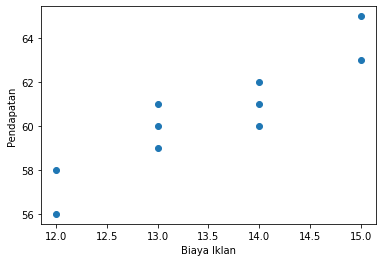

In [14]:
plt.scatter(X, Y)
plt.xlabel('Biaya Iklan')
plt.ylabel('Pendapatan')
plt.show()